In [40]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

__Udacity project__ 

"Follow the CRISP-DM method for, preparing, analyzing, model and visualizing data and answering three business related questions. Create a blog post to share your insights to a non-technincal audience."

## Business questions:

* What quantitative features has the most impact on the price?

* Can we see any differences in what makes an impact on the price in the airbnb-market comparing Manhattan and Brooklyn?

* Can we predict the airbnb price using machine learning?


#### For this analysis I've chosen airbnb-apartments/entire homes only i.e. excluding room only etc.


## Assess the data

In [3]:
df_nyc = pd.read_csv('listings_nyc.csv.gz')

print(df_nyc.shape)
df_nyc.head(20)

(50220, 96)


C:\Users\jskip\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20180908060534,2018-09-08,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and ...,-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUE...,Step into our artistic spacious apartment and ...,none,NaN,Please no cooking at night but you can warm up...,Subway 2.3.B.C. at 110th street around the cor...,Guests will have their PRIVATE BATHROOM (NOTE:...,We will have a list of Harlem restaurants and ...,no-smoking/please take off your shoes: cleanin...,NaN,NaN,https://a0.muscache.com/im/pictures/d0489e42-4...,NaN,2758,https://www.airbnb.com/users/show/2758,Steph,2008-09-06,"New York, New York, United States",loves to host and welcome travelers from arou...,within a few hours,93%,NaN,f,https://a0.muscache.com/im/users/2758/profile_...,https://a0.muscache.com/im/users/2758/profile_...,Harlem,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"New York, NY, United States",Harlem,Harlem,Manhattan,New York,NY,10026,New York,"New York, NY",US,United States,40.799205,-73.953676,t,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$59.00,$720.00,"$1,690.00",$0.00,$60.00,2,$39.00,2,21,4 days ago,t,6,26,52,317,2018-09-08,170,2008-10-13,2018-07-05,93.0,9.0,9.0,10.0,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,1.41
1,2539,https://www.airbnb.com/rooms/2539,20180908060534,2018-09-08,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,If this room is unavailable on your desired da...,Very close to F and G trains and Express bus i...,NaN,NaN,-The security and comfort of all our guests is...,NaN,NaN,https://a0.muscache.com/im/pictures/3949d073-a...,NaN,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, New York, United States",Educated professional living in Brooklyn. I l...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/8674565a-7...,https://a0.muscache.com/im/pictures/8674565a-7...,Gravesend,8.0,8.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn , NY, United States",Kensington,Kensington,Brooklyn,Brooklyn,NY,11218,New York,"Brooklyn , NY",US,United States,40.647486,-73.972370,f,Apartment,Private room,4,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wheelchair accessible...",NaN,$149.00,$299.00,$999.00,$100.00,$25.00,1,$25.00,1,730,yesterday,t,30,60,90,365,2018-09-08,8,2015-12

In [10]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50220 entries, 0 to 50219
Data columns (total 96 columns):
id                                  50220 non-null int64
listing_url                         50220 non-null object
scrape_id                           50220 non-null int64
last_scraped                        50220 non-null object
name                                50195 non-null object
summary                             48360 non-null object
space                               34428 non-null object
description                         49793 non-null object
experiences_offered                 50220 non-null object
neighborhood_overview               29794 non-null object
notes                               19829 non-null object
transit                             31136 non-null object
access                              29056 non-null object
interaction                         27817 non-null object
house_rules                         29928 non-null object
thumbnail_url          

In [22]:
df_nyc.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [4]:
df_nyc['price'].value_counts().head(20)

$150.00    2082
$100.00    2062
$50.00     1607
$60.00     1524
$200.00    1453
$75.00     1410
$80.00     1298
$65.00     1258
$70.00     1248
$120.00    1150
$125.00    1125
$90.00     1077
$250.00    1042
$55.00     1014
$45.00      998
$85.00      896
$175.00     814
$110.00     799
$40.00      774
$99.00      771
Name: price, dtype: int64

In [10]:
df_nyc.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,5.022000e+04,5.022000e+04,0.0,0.0,0.0,5.022000e+04,0.0,50212.000000,50212.000000,50220.000000,50220.000000,50220.000000,50118.000000,50163.000000,50151.000000,480.000000,50220.000000,50220.000000,5.022000e+04,50220.000000,50220.000000,50220.000000,50220.000000,50220.000000,38320.000000,38265.000000,38284.000000,38234.000000,38272.000000,38225.000000,38227.000000,50220.000000,39430.000000
mean,1.497282e+07,2.018091e+13,NaN,NaN,NaN,5.084270e+07,NaN,7.067554,7.067554,40.730256,-73.953910,2.855775,1.142843,1.173973,1.580168,717.593750,1.499462,7.666129,4.423224e+04,4.866169,13.482178,25.310832,115.112286,20.518698,93.739953,9.588031,9.258855,9.733169,9.747466,9.497135,9.385931,3.674432,1.371837
std,8.337962e+06,8.257895e+00,NaN,NaN,NaN,5.753180e+07,NaN,50.202553,50.202553,0.053890,0.043697,1.871913,0.487956,0.749742,1.087328,596.758089,1.122914,223.928892,9.583607e+06,8.308336,18.847532,30.548461,133.482925,38.799677,8.443943,0.842557,1.076748,0.720069,0.714583,0.795780,0.892942,11.883099,1.618252
min,2.515000e+03,2.018091e+13,NaN,NaN,NaN,2.830000e+02,NaN,0.000000,0.000000,40.499794,-74.240843,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,7.819687e+06,2.018091e+13,NaN,NaN,NaN,6.790942e+06,NaN,1.000000,1.000000,40.691374,-73.983392,2.000000,1.000000,1.000000,1.000000,343.250000,1.000000,1.000000,2.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.580019e+07,2.018091e+13,NaN,NaN,NaN,2.551790e+07,NaN,1.000000,1.000000,40.724806,-73.956768,2.000000,1.000000,1.000000,1.000000,700.000000,1.000000,2.000000,1.124000e+03,0.000000,2.000000,7.000000,48.000000,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.730000
75%,2.201577e+07,2.018091e+13,NaN,NaN,NaN,7.566164e+07,NaN,2.000000,2.000000,40.763945,-73.938522,4.000000,1.000000,1.000000,2.000000,950.000000,2.000000,5.000000,1.125000e+03,6.000000,23.000000,49.000000,250.000000,21.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.010000
max,2.837234e+07,2.018091e+13,NaN,NaN,NaN,2.141907e+08,NaN,886.000000,886.000000,40.911841,-73.712116,16.000000,48.000000,15.000000,40.000000,5000.000000,16.000000,50000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,550.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,19.190000


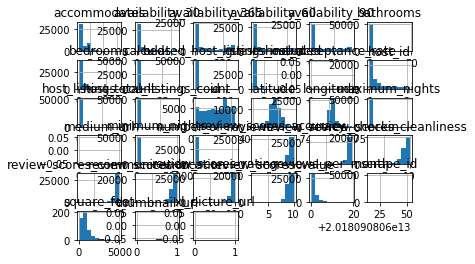

In [54]:
df_nyc.hist();

## Clean the data

In [21]:
# Making a copy before cleaning
nyc_clean = df_nyc.copy()

In [28]:
# Converting currency(object) to float.
nyc_clean['price'] = nyc_clean['price'].replace('[\$,)]','', regex=True).astype('float')

In [31]:
nyc_clean.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,5.022000e+04,5.022000e+04,0.0,0.0,0.0,5.022000e+04,0.0,50212.000000,50212.000000,50220.000000,50220.000000,50220.000000,50118.000000,50163.000000,50151.000000,480.000000,50220.000000,50220.000000,50220.000000,5.022000e+04,50220.000000,50220.000000,50220.000000,50220.000000,50220.000000,38320.000000,38265.000000,38284.000000,38234.000000,38272.000000,38225.000000,38227.000000,50220.000000,39430.000000
mean,1.497282e+07,2.018091e+13,NaN,NaN,NaN,5.084270e+07,NaN,7.067554,7.067554,40.730256,-73.953910,2.855775,1.142843,1.173973,1.580168,717.593750,152.556093,1.499462,7.666129,4.423224e+04,4.866169,13.482178,25.310832,115.112286,20.518698,93.739953,9.588031,9.258855,9.733169,9.747466,9.497135,9.385931,3.674432,1.371837
std,8.337962e+06,8.257895e+00,NaN,NaN,NaN,5.753180e+07,NaN,50.202553,50.202553,0.053890,0.043697,1.871913,0.487956,0.749742,1.087328,596.758089,491.787605,1.122914,223.928892,9.583607e+06,8.308336,18.847532,30.548461,133.482925,38.799677,8.443943,0.842557,1.076748,0.720069,0.714583,0.795780,0.892942,11.883099,1.618252
min,2.515000e+03,2.018091e+13,NaN,NaN,NaN,2.830000e+02,NaN,0.000000,0.000000,40.499794,-74.240843,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,7.819687e+06,2.018091e+13,NaN,NaN,NaN,6.790942e+06,NaN,1.000000,1.000000,40.691374,-73.983392,2.000000,1.000000,1.000000,1.000000,343.250000,69.000000,1.000000,1.000000,2.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.580019e+07,2.018091e+13,NaN,NaN,NaN,2.551790e+07,NaN,1.000000,1.000000,40.724806,-73.956768,2.000000,1.000000,1.000000,1.000000,700.000000,105.000000,1.000000,2.000000,1.124000e+03,0.000000,2.000000,7.000000,48.000000,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.730000
75%,2.201577e+07,2.018091e+13,NaN,NaN,NaN,7.566164e+07,NaN,2.000000,2.000000,40.763945,-73.938522,4.000000,1.000000,1.000000,2.000000,950.000000,175.000000,2.000000,5.000000,1.125000e+03,6.000000,23.000000,49.000000,250.000000,21.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.010000
max,2.837234e+07,2.018091e+13,NaN,NaN,NaN,2.141907e+08,NaN,886.000000,886.000000,40.911841,-73.712116,16.000000,48.000000,15.000000,40.000000,5000.000000,97598.000000,16.000000,50000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,550.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,19.190000


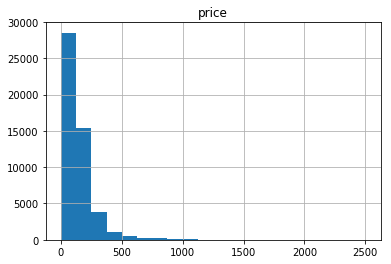

In [60]:
# Plotting the price distribution
nyc_clean.hist('price', range=(0, 2500), bins=20);

In [61]:
# Filtering out other listings than "Entire home/apt", as I wish to compare whole apartments only
nyc_clean = nyc_clean[nyc_clean['room_type'] == 'Entire home/apt']
nyc_clean.room_type.value_counts()

Entire home/apt    26102
Name: room_type, dtype: int64

In [65]:
nyc_clean.price.sort_values(ascending=False).head(50)

48896    18949.0
39035    10000.0
13486    10000.0
22221    10000.0
7956      9999.0
40719     8500.0
5306      8000.0
4569      6500.0
19463     6000.0
26324     5500.0
4498      5250.0
3271      5000.0
5305      4500.0
38595     4160.0
4470      4000.0
28990     4000.0
28040     4000.0
48601     3750.0
4593      3750.0
49508     3600.0
1967      3300.0
24401     3270.0
42365     3000.0
23535     3000.0
41703     2990.0
43570     2921.0
915       2900.0
22189     2800.0
4581      2750.0
7091      2695.0
12539     2600.0
914       2600.0
20741     2500.0
2443      2500.0
19254     2500.0
40707     2500.0
29695     2500.0
23129     2500.0
7660      2500.0
4586      2500.0
31539     2500.0
33957     2450.0
35478     2400.0
22374     2350.0
5011      2300.0
36555     2200.0
18166     2100.0
24466     2000.0
13558     2000.0
28879     2000.0
Name: price, dtype: float64

In [63]:
nyc_clean.price.sort_values(ascending=False).tail(50)

19187    40.0
20897    40.0
45501    39.0
32651    39.0
32529    39.0
38624    38.0
8787     38.0
46564    38.0
49501    37.0
9587     37.0
8857     37.0
32550    35.0
33557    34.0
36079    32.0
40729    31.0
38464    30.0
17460    30.0
41589    30.0
21644    30.0
28955    29.0
30482    28.0
39142    28.0
25773    25.0
44859    25.0
37954    22.0
27381    20.0
38123    20.0
5411     16.0
9997     16.0
5609     16.0
22097    15.0
27236    12.0
37543    12.0
26828    11.0
29465    10.0
3471     10.0
30075    10.0
37157    10.0
45803    10.0
34613    10.0
33334    10.0
49962    10.0
33790     0.0
34494     0.0
32613     0.0
33206     0.0
33439     0.0
34960     0.0
33637     0.0
44497     0.0
Name: price, dtype: float64

In [68]:
# Removing outliers(price below $40)
nyc_clean = nyc_clean[nyc_clean['price'] >= 40]


In [69]:
# Removing outliers(price above $2000)
nyc_clean = nyc_clean[nyc_clean['price'] <= 2000]

In [71]:
nyc_clean.shape

(26007, 96)

In [81]:
nyc_clean.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.600700e+04,2.600700e+04,0.0,0.0,0.0,2.600700e+04,0.0,26004.000000,26004.000000,26007.000000,26007.000000,26007.000000,25977.000000,25956.000000,25989.000000,320.000000,26007.000000,26007.000000,26007.000000,2.600700e+04,26007.000000,26007.000000,26007.000000,26007.000000,26007.000000,20407.000000,20384.000000,20392.000000,20370.000000,20388.000000,20368.000000,20366.000000,26007.000000,20910.000000
mean,1.441540e+07,2.018091e+13,NaN,NaN,NaN,4.743190e+07,NaN,11.113406,11.113406,40.731053,-73.962285,3.738493,1.153058,1.307983,1.953865,823.193750,202.551236,1.809590,10.018880,8.403702e+04,4.322144,11.735648,22.895874,117.410736,21.007267,94.081786,9.616660,9.321842,9.746441,9.768687,9.568392,9.367181,4.931557,1.312901
std,8.435055e+06,6.636846e+00,NaN,NaN,NaN,5.660098e+07,NaN,69.302025,69.302025,0.049692,0.039259,2.061860,0.446966,0.965400,1.300503,535.864684,157.230231,1.398479,310.790053,1.331691e+07,7.810410,17.474255,28.648764,132.689456,37.713650,7.729337,0.782937,0.989741,0.664102,0.658607,0.715433,0.864052,16.059798,1.499300
min,2.595000e+03,2.018091e+13,NaN,NaN,NaN,2.571000e+03,NaN,0.000000,0.000000,40.508684,-74.239859,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,7.054810e+06,2.018091e+13,NaN,NaN,NaN,5.459948e+06,NaN,1.000000,1.000000,40.694260,-73.987534,2.000000,1.000000,1.000000,1.000000,500.000000,120.000000,1.000000,2.000000,3.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.210000
50%,1.477233e+07,2.018091e+13,NaN,NaN,NaN,2.242375e+07,NaN,1.000000,1.000000,40.729172,-73.965947,3.000000,1.000000,1.000000,2.000000,750.000000,160.000000,1.000000,3.000000,1.124000e+03,0.000000,2.000000,7.000000,51.000000,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.690000
75%,2.180369e+07,2.018091e+13,NaN,NaN,NaN,6.791035e+07,NaN,2.000000,2.000000,40.763201,-73.946652,4.000000,1.000000,2.000000,2.000000,1000.000000,227.000000,2.000000,5.000000,1.125000e+03,5.000000,17.000000,42.000000,252.000000,23.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,2.000000
max,2.837234e+07,2.018091e+13,NaN,NaN,NaN,2.141378e+08,NaN,886.000000,886.000000,40.911841,-73.717952,16.000000,15.500000,15.000000,40.000000,5000.000000,2000.000000,16.000000,50000.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,443.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,132.000000,13.060000


In [82]:
# Saving DataFrame for later
nyc_clean.to_csv('nyc_clean.csv', index=False)

In [3]:
# Loading nyc_clean
nyc_clean = pd.read_csv('nyc_clean.csv')

C:\Users\jskip\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,15,16,18,27,33,43,53,54,65,67,68,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I'm removing all categorical variables and mixed types, only focusing this analysis on quantative variables.
The reason for is simply to prepare the dataset for the machine learning algorithms I have chosen for this project
as they only work with numerical variables. There are also different techniques to transform categorical variables
for example one-hot encoding.

In [4]:
# Creating new dataframe containing quantitave features only
# (+ neighbourhood_group_cleansed - need this feature to divide into Manhattan and Brooklyn later).
num_var = nyc_clean[['host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                     'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30',
                     'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating',
                     'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'neighbourhood_group_cleansed']]
num_var.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,neighbourhood_group_cleansed
0,5,2,1,0.0,1.0,225.0,2,1,1125,16.0,46.0,76.0,341.0,34.0,94.0,9.0,9.0,9.0,10.0,10.0,9.0,2.0,0.32,Manhattan
1,1,3,1,1.0,3.0,89.0,1,1,730,0.0,0.0,2.0,182.0,211.0,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1.0,4.40,Brooklyn
2,1,2,1,2.0,2.0,85.0,2,1,730,0.0,0.0,0.0,62.0,3.0,100.0,10.0,10.0,9.0,10.0,9.0,10.0,1.0,0.53,Manhattan
3,1,1,1,NaN,1.0,80.0,1,5,120,0.0,5.0,35.0,35.0,7.0,94.0,10.0,9.0,10.0,10.0,9.0,10.0,1.0,0.09,Manhattan
4,1,2,1,1.0,1.0,185.0,2,2,16,5.0,27.0,52.0,322.0,65.0,87.0,9.0,9.0,10.0,10.0,9.0,9.0,1.0,0.57,Manhattan


In [6]:
num_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26008 entries, 0 to 26007
Data columns (total 24 columns):
host_total_listings_count         26004 non-null object
accommodates                      26007 non-null object
bathrooms                         25977 non-null object
bedrooms                          25956 non-null float64
beds                              25989 non-null float64
price                             26007 non-null float64
guests_included                   26007 non-null object
minimum_nights                    26007 non-null object
maximum_nights                    26007 non-null object
availability_30                   26007 non-null float64
availability_60                   26006 non-null float64
availability_90                   26006 non-null float64
availability_365                  26006 non-null float64
number_of_reviews                 26006 non-null float64
review_scores_rating              20406 non-null float64
review_scores_accuracy            20383 no

As we can see above, my new dataframe still consists of NaN-values and 'object' dtypes. 
Both has to be handled in order to work properly going forward with machine learning algorithms.
There are also different techniques converting NaN's to not-Nan's, one is imputing them with mean values,
but since I'm left almost 80% of the data after dropping all NaN's I'm going with that solution to my problem.

In [7]:
# Drop all rows with missing values
num_var = num_var.dropna()

In [8]:
num_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20272 entries, 0 to 25929
Data columns (total 24 columns):
host_total_listings_count         20272 non-null object
accommodates                      20272 non-null object
bathrooms                         20272 non-null object
bedrooms                          20272 non-null float64
beds                              20272 non-null float64
price                             20272 non-null float64
guests_included                   20272 non-null object
minimum_nights                    20272 non-null object
maximum_nights                    20272 non-null object
availability_30                   20272 non-null float64
availability_60                   20272 non-null float64
availability_90                   20272 non-null float64
availability_365                  20272 non-null float64
number_of_reviews                 20272 non-null float64
review_scores_rating              20272 non-null float64
review_scores_accuracy            20272 no

In [9]:
# Convert all the quantitative features i want to use from object type to float
num_var['host_total_listings_count'] = num_var['host_total_listings_count'].astype('float')
num_var['accommodates'] = num_var['accommodates'].astype('float')
num_var['bathrooms'] = num_var['bathrooms'].astype('float')
num_var['guests_included'] = num_var['guests_included'].astype('float')
num_var['minimum_nights'] = num_var['minimum_nights'].astype('float')
num_var['maximum_nights'] = num_var['maximum_nights'].astype('float')

In [10]:
num_var.isnull().sum()

host_total_listings_count         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
reviews_per_month                 0
neighbourhood_group_cleansed      0
dtype: int64

In [132]:
# Divide in neighbourhood
num_var.neighbourhood_group_cleansed.value_counts()

Manhattan        10569
Brooklyn          7784
Queens            1549
Bronx              259
Staten Island      111
Name: neighbourhood_group_cleansed, dtype: int64

### Dividing in two subsets based on where apartments are located one on Manhattan and one in Brooklyn

In [28]:
# Creating a new DF with apartments located on Manhattan only
num_var_manhattan = num_var.copy()

In [29]:
num_var_manhattan = num_var[num_var['neighbourhood_group_cleansed'] == 'Manhattan'].copy()
num_var_manhattan.drop(['neighbourhood_group_cleansed'], axis=1, inplace=True)
num_var_manhattan.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,5.0,2.0,1.0,0.0,1.0,225.0,2.0,1.0,1125.0,16.0,46.0,76.0,341.0,34.0,94.0,9.0,9.0,9.0,10.0,10.0,9.0,2.0,0.32
2,1.0,2.0,1.0,2.0,2.0,85.0,2.0,1.0,730.0,0.0,0.0,0.0,62.0,3.0,100.0,10.0,10.0,9.0,10.0,9.0,10.0,1.0,0.53
4,1.0,2.0,1.0,1.0,1.0,185.0,2.0,2.0,16.0,5.0,27.0,52.0,322.0,65.0,87.0,9.0,9.0,10.0,10.0,9.0,9.0,1.0,0.57
5,1.0,2.0,1.0,1.0,1.0,129.0,2.0,3.0,30.0,0.0,0.0,0.0,0.0,78.0,94.0,10.0,10.0,9.0,10.0,10.0,10.0,1.0,0.68
7,4.0,3.0,1.0,1.0,2.0,120.0,2.0,1.0,1125.0,0.0,0.0,4.0,229.0,148.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,4.0,1.35


In [13]:
num_var_manhattan.shape

(10569, 23)

In [14]:
# Creating a new DF with apartments located in Brooklyn only
num_var_brooklyn = num_var.copy()

In [15]:
num_var_brooklyn = num_var[num_var['neighbourhood_group_cleansed'] == 'Brooklyn'].copy()
num_var_brooklyn.drop(['neighbourhood_group_cleansed'], axis=1, inplace=True)
num_var_brooklyn.head()

,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
1,1.0,3.0,1.0,1.0,3.0,89.0,1.0,1.0,730.0,0.0,0.0,2.0,182.0,211.0,91.0,9.0,9.0,10.0,10.0,9.0,9.0,1.0,4.40
11,1.0,4.0,1.0,1.0,2.0,215.0,2.0,2.0,30.0,8.0,23.0,52.0,320.0,163.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.55
13,1.0,3.0,1.0,1.0,1.0,99.0,3.0,3.0,730.0,2.0,9.0,23.0,171.0,8.0,95.0,10.0,9.0,10.0,10.0,10.0,10.0,1.0,4.44
18,2.0,5.0,1.0,1.0,4.0,120.0,4.0,2.0,365.0,4.0,7.0,32.0,296.0,65.0,95.0,10.0,9.0,10.0,10.0,9.0,9.0,2.0,0.59
21,2.0,2.0,1.0,1.0,1.0,85.0,2.0,2.0,50.0,0.0,6.0,23.0,23.0,183.0,86.0,9.0,9.0,10.0,9.0,9.0,9.0,2.0,1.69


In [16]:
num_var_brooklyn.shape

(7784, 23)

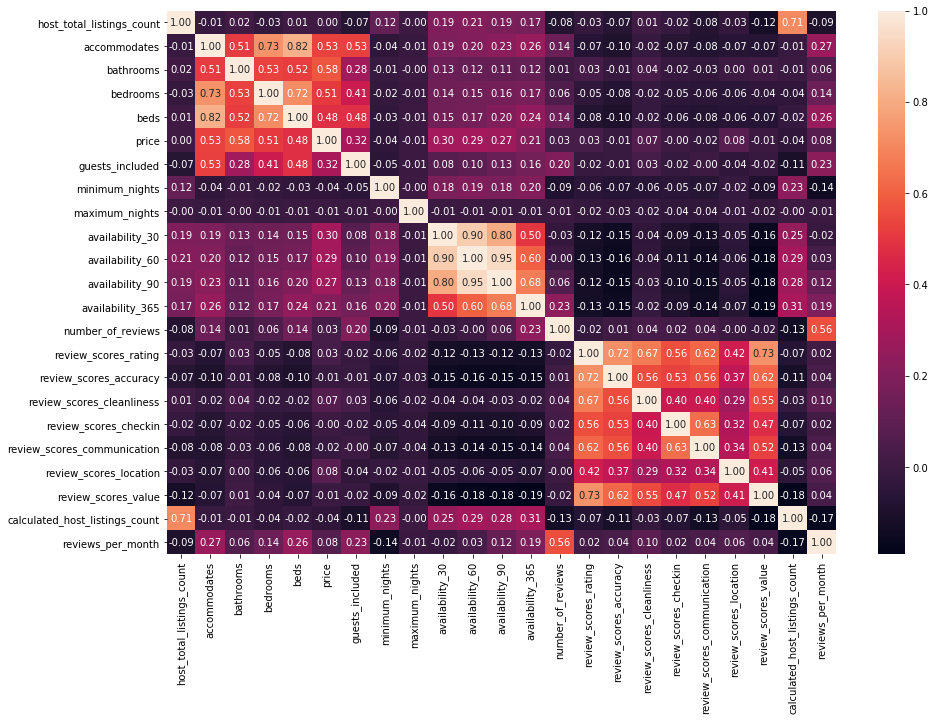

In [137]:
# Creating correlation heatmap - Manhattan
plt.subplots(figsize=(15,10))
sns.heatmap(num_var_manhattan.corr(), annot=True, fmt=".2f");

#### After viewing the heatmap it is clear that we still have some redundant features that we can remove, also I wish to remove features with high internal correlation to make sure the features are independent

In [30]:
# Drop columns
num_var_manhattan.drop(['bedrooms', 'beds', 'availability_60', 'availability_90', 'availability_365',
                        'calculated_host_listings_count', 'review_scores_accuracy'], axis=1, inplace=True)

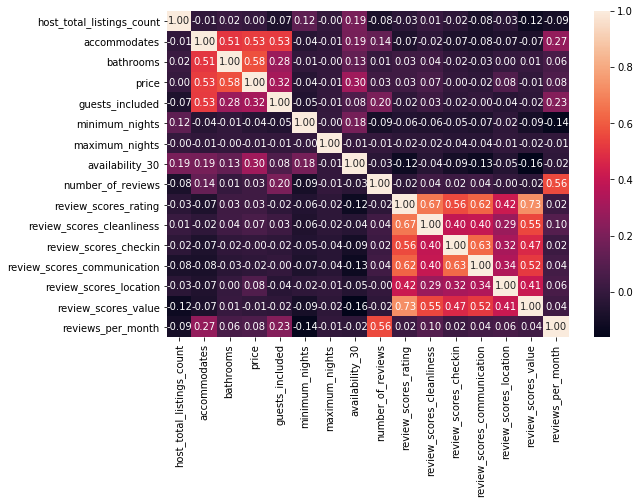

In [92]:
# New heatmap - Manhattan
plt.pyplot.subplots(figsize=(9,6))
sns.heatmap(num_var_manhattan.corr(), annot=True, fmt=".2f");

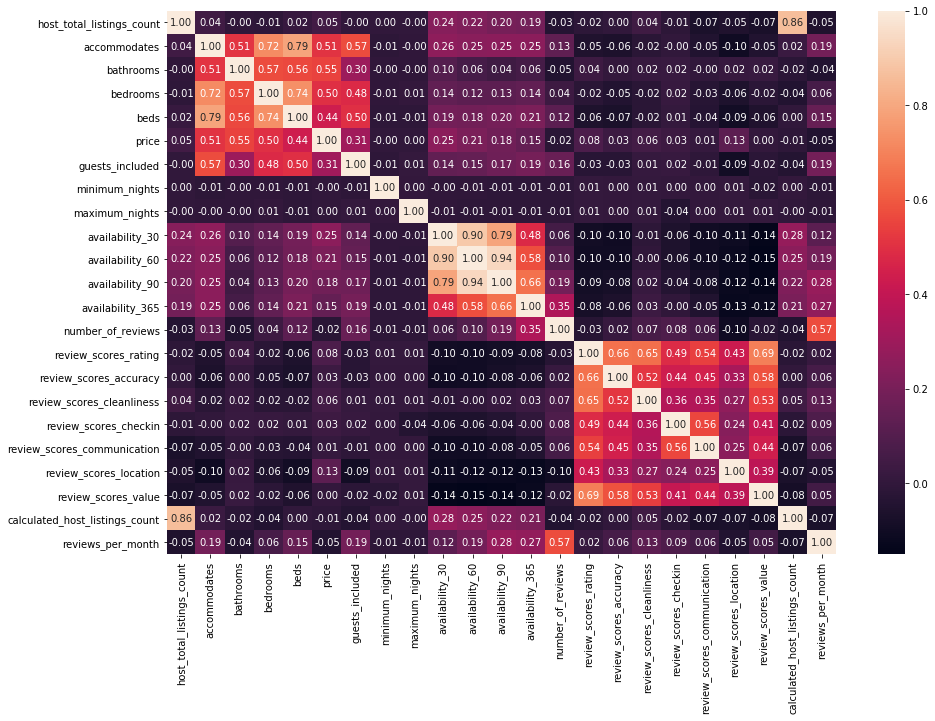

In [138]:
# Creating correlation heatmap - Brooklyn
plt.subplots(figsize=(15,10))
sns.heatmap(num_var_brooklyn.corr(), annot=True, fmt=".2f");

In [32]:
# Drop columns
num_var_brooklyn.drop(['bedrooms', 'beds', 'availability_60', 'availability_90', 'availability_365',
                        'calculated_host_listings_count', 'review_scores_accuracy'], axis=1, inplace=True)

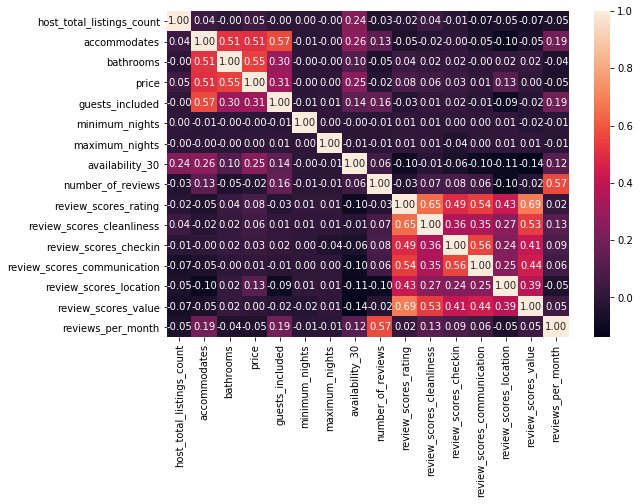

In [93]:
# New heatmap - Brooklyn
plt.pyplot.subplots(figsize=(9,6))
sns.heatmap(num_var_brooklyn.corr(), annot=True, fmt=".2f");

__Question 1)__

 __What quantitative features has the most impact on the price?__



Answer:
* how many does the apartment __accomodate__
* how many __bathrooms__ does the apartment have
* how many __guests is included__

#### View the relationship between the features with highest correlation to price, comparing Manhattan vs Brooklyn

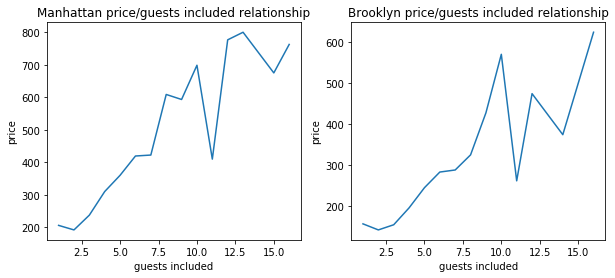

In [76]:
price_guest = pd.DataFrame(num_var_manhattan.groupby("guests_included")['price'].mean(), columns=['price'])

plt.pyplot.subplots(figsize=(10,4))
plt.pyplot.subplot(1, 2, 1)
plt.pyplot.title("Manhattan price/guests included relationship")
plt.pyplot.ylabel("price")
plt.pyplot.xlabel("guests included")
plt.pyplot.plot(price_guest)

price_guest2 = pd.DataFrame(num_var_brooklyn.groupby("guests_included")['price'].mean(), columns=['price'])

plt.pyplot.subplot(1, 2, 2)
plt.pyplot.title("Brooklyn price/guests included relationship")
plt.pyplot.ylabel("price")
plt.pyplot.xlabel("guests included")
plt.pyplot.plot(price_guest2);

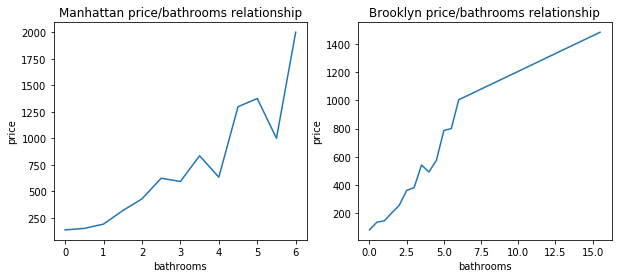

In [66]:
price_bathr = pd.DataFrame(num_var_manhattan.groupby("bathrooms")['price'].mean(), columns=['price'])

plt.pyplot.subplots(figsize=(10,4))
plt.pyplot.subplot(1, 2, 1)
plt.pyplot.title("Manhattan price/bathrooms relationship")
plt.pyplot.ylabel("price")
plt.pyplot.xlabel("bathrooms")
plt.pyplot.plot(price_bathr)

price_bathr2 = pd.DataFrame(num_var_brooklyn.groupby("bathrooms")['price'].mean(), columns=['price'])

plt.pyplot.subplot(1, 2, 2)
plt.pyplot.title("Brooklyn price/bathrooms relationship")
plt.pyplot.ylabel("price")
plt.pyplot.xlabel("bathrooms")
plt.pyplot.plot(price_bathr2);

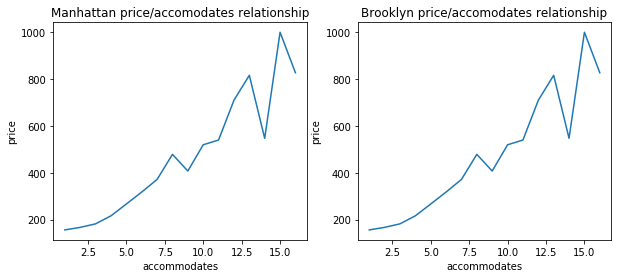

In [67]:
price_accom = pd.DataFrame(num_var_manhattan.groupby("accommodates")['price'].mean(), columns=['price'])

plt.pyplot.subplots(figsize=(10,4))
plt.pyplot.subplot(1, 2, 1)
plt.pyplot.title("Manhattan price/accomodates relationship")
plt.pyplot.ylabel("price")
plt.pyplot.xlabel("accommodates")
plt.pyplot.plot(price_accom);

price_accom2 = pd.DataFrame(num_var_brooklyn.groupby("accommodates")['price'].mean(), columns=['price'])

plt.pyplot.subplot(1, 2, 2)
plt.pyplot.title("Brooklyn price/accomodates relationship")
plt.pyplot.ylabel("price")
plt.pyplot.xlabel("accommodates")
plt.pyplot.plot(price_accom);



__Question 2)__

__Can we see any differences in what makes an impact on the price in the airbnb-market comparing Manhattan and Brooklyn?__


Answer:
* There are basically very small differences in the features that has an impact on price between Brooklyn and Manhattan, based on the correlation matrix, one conclusion is that location seems to have an even greater impact in Brooklyn than on Manhattan

#### Comparing these plots, one clearly can see that the data gets noisy when "extreme" values occur. I'm therefore creating subsets where I set tresholds in order to keep the data more smooth. Below I will also compare the results on these modified data vs. unmodified after applying them to two different machine learning models.

In [70]:
# Modifying Manhattan features
manhattan_mod = num_var_manhattan[num_var_manhattan.accommodates <= 8]
manhattan_mod = num_var_manhattan[num_var_manhattan.bathrooms <= 3.5]
manhattan_mod = num_var_manhattan[num_var_manhattan.guests_included <= 10]

In [72]:
# Modifying Brooklyn features
brooklyn_mod = num_var_brooklyn[num_var_brooklyn.accommodates <= 8]
brooklyn_mod = num_var_brooklyn[num_var_brooklyn.bathrooms <= 3.5]
brooklyn_mod = num_var_brooklyn[num_var_brooklyn.guests_included <= 10]

#### I will now try to see how well I'm able to predict the airbnb price using machine learning algorithms, using numerical variables as explanatory input to predict the price on the listings, and finally testing the results against the actual price. Models of choice is  Linear Regression and Random Forest.

###  Linear Regression

In [36]:
def run_model(df):
    # splitting data into explanatory variables and one to predict.
    X = df[['host_total_listings_count', 'accommodates', 'bathrooms', 
            'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30',
            'number_of_reviews', 'review_scores_rating',
            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'reviews_per_month']]
    y = df['price']

    # splitting data in training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)

    # Instantiate
    model = LinearRegression(normalize=True)
    
    # fit a linear model
    model.fit(X_train, y_train)

    # Predictions
    y_test_preds = model.predict(X_test)
    y_train_preds = model.predict(X_train)

    # R-squared score
    r2_test = r2_score(y_test, y_test_preds)
    r2_train = r2_score(y_train, y_train_preds)

    print('Rsquared on test data: {}'.format(r2_test))
    print('Rsquared on train data: {}'.format(r2_train))

In [37]:
# Original features
run_model(num_var_manhattan)

Rsquared on test data: 0.42623423186219966
Rsquared on train data: 0.4831512381641574


In [71]:
# Features modified
run_model(manhattan_mod)

Rsquared on test data: 0.46196245374924083
Rsquared on train data: 0.4588459444551717


In [38]:
# new features
run_model(num_var_brooklyn)

Rsquared on test data: -3.7927640480169647
Rsquared on train data: 0.4193773774662404


In [73]:
#features modified
run_model(brooklyn_mod)

Rsquared on test data: 0.40132770430764186
Rsquared on train data: 0.4270612672083183


### Random Forest

In [81]:
def run_forest_run(df):
    X = df[['host_total_listings_count', 'accommodates', 'bathrooms', 
            'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30',
            'number_of_reviews', 'review_scores_rating',
            'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
            'review_scores_value', 'reviews_per_month']]
    y = df['price']

    # splitting data in training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.30, random_state=42)
   
    # specify parameters and distributions to sample from
    param_dist = {"max_depth": randint(3,15),
                  "n_estimators" : [100, 1000],
                  "min_samples_split": randint(2, 11),
                  "bootstrap": [True, False],
                  "min_samples_leaf" : randint(1,10)
                                }
    n_iter_search = 20
    randommodel = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                       n_iter=n_iter_search, cv=5)
    randommodel.fit(X_train, y_train)
    
    # Prediction
    y_pred = randommodel.predict(X_test)
    # Score
    r2_test = r2_score(y_test, y_pred)
    
    print('Rsquared on test data: {}'.format(r2_test))

In [82]:
# Result on num_var Manhattan data
run_forest_run(num_var_manhattan)

Rsquared on test data: 0.47344839358610924


In [83]:
# Results on the modified Manhattan data
run_forest_run(manhattan_mod)

Rsquared on test data: 0.5205517858564936


In [84]:
# Results on num_var Brooklyn data
run_forest_run(num_var_brooklyn)

Rsquared on test data: 0.4835078000317159


In [85]:
# Results on the modified Brooklyn data
run_forest_run(brooklyn_mod)

Rsquared on test data: 0.4445488582164103


__Question 3)__
__Can we predict the airbnb price using machine learning?__


Answer:
I used both Linear Regression and Random Forest to try predict airbnb rental price.
Both models where able to predict, but the results where not very satisfying.

__Linear Regression__
On the Manhattan data I achieved a r2-score on the test set of 46% after modifying "extreme values".
On the Brooklyn data I achieved a r2-score on the test set of 40% after modification, I was actually not able to get a positive r2 score before modyfing the data, meaning the model did not fit the data at all. 

__Random Forest__
Manhatten dataset achieved a r2 score of 52%, Brooklyn 48%.
In this case the less modyfied data gave a better score on the Brooklyn sub set but not on the Manhattan subset.

__Conclusion__
Yes, I was able to achieve a r2 score of about 50% but that result is not very pleasing. 
Applying more features, for example encode some of the categorical features might have helped.
Also, comparing the two datasets, the Brooklyn subset had about 30% less rows which is likely to make an impact on the result using machine learning as the models gets better the more data you have.
